# 1.将数据集划分成训练集、验证集、测试集并存储成TFRecord文件

In [2]:
#encoding:utf-8
import os 
import tensorflow as tf 
from PIL import Image  #注意Image,后面会用到
import numpy as np
import random
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

In [3]:
#utils/mnist_reader.py
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [5]:
#划分数据集
index=list(range(0,X_train.shape[0]))
var_index=random.sample(index, int(X_train.shape[0]/5))#12000

X_val=X_train[var_index,:]###验证集X
y_val=y_train[var_index,]###验证集y
for x in var_index:
    index.remove(x)

X_train=X_train[index,:]###训练集X,,,,,40000,784
y_train=y_train[index,]###训练集y,,,,,,40000

## 1.1存储成TFrecord文件

In [12]:
writer= tf.python_io.TFRecordWriter("./trainXy.tfrecords") #要生成的文件
for i in range(X_train.shape[0]):
    #print(i)
    #print(X_train[i].tostring())
    example = tf.train.Example(features=tf.train.Features(feature={
            "img_raw": tf.train.Feature(bytes_list=tf.train.BytesList(value=[X_train[i,:].tostring()])),
            'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[y_train[i]]))#.tostring()
        })) #example对象对label和image数据进行封装
    writer.write(example.SerializeToString())  #序列化为字符串
writer.close()

In [7]:
writer= tf.python_io.TFRecordWriter("./val_Xy.tfrecords") #要生成的文件
for i in range(X_val.shape[0]):
    #print(i)
    #print(X_train[i].tostring())
    example = tf.train.Example(features=tf.train.Features(feature={
            "img_raw": tf.train.Feature(bytes_list=tf.train.BytesList(value=[X_val[i,:].tostring()])),
            'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[y_val[i]]))#.tostring()
        })) #example对象对label和image数据进行封装
    writer.write(example.SerializeToString())  #序列化为字符串
writer.close()

In [10]:
writer= tf.python_io.TFRecordWriter("./test_Xy.tfrecords") #要生成的文件
for i in range(X_test.shape[0]):
    example = tf.train.Example(features=tf.train.Features(feature={
            "img_raw": tf.train.Feature(bytes_list=tf.train.BytesList(value=[X_test[i,:].tostring()])),#(bytes_list=tf.train.BytesList(value=[value]))
            'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[y_test[i]]))#.tostring()
        })) #example对象对label和image数据进行封装
    writer.write(example.SerializeToString())  #序列化为字符串
writer.close()

# 2 .TFrecord数据可视化

In [64]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
X_train.shape

(60000, 784)

In [65]:
temp=np.array([i.reshape([28,28]) for i in X_train])
temp.shape#(60000, 28, 28)

(60000, 28, 28)

In [66]:
labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# 0	T-shirt/top（T恤）
# 1	Trouser（裤子）
# 2	Pullover（套衫）
# 3	Dress（裙子）
# 4	Coat（外套）
# 5	Sandal（凉鞋）
# 6	Shirt（汗衫）
# 7	Sneaker（运动鞋）
# 8	Bag（包）
# 9	Ankle boot（踝靴）

Text(0.5,1,'ankle_boots')

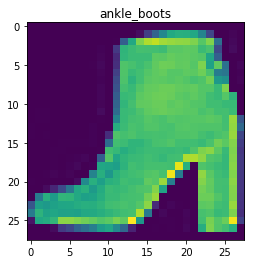

In [69]:
#运行本段,随机抽取单个显示
numb=random.randint(0,X_train.shape[0])
plt.imshow(temp[numb])
plt.title(labels[y_train[numb]])

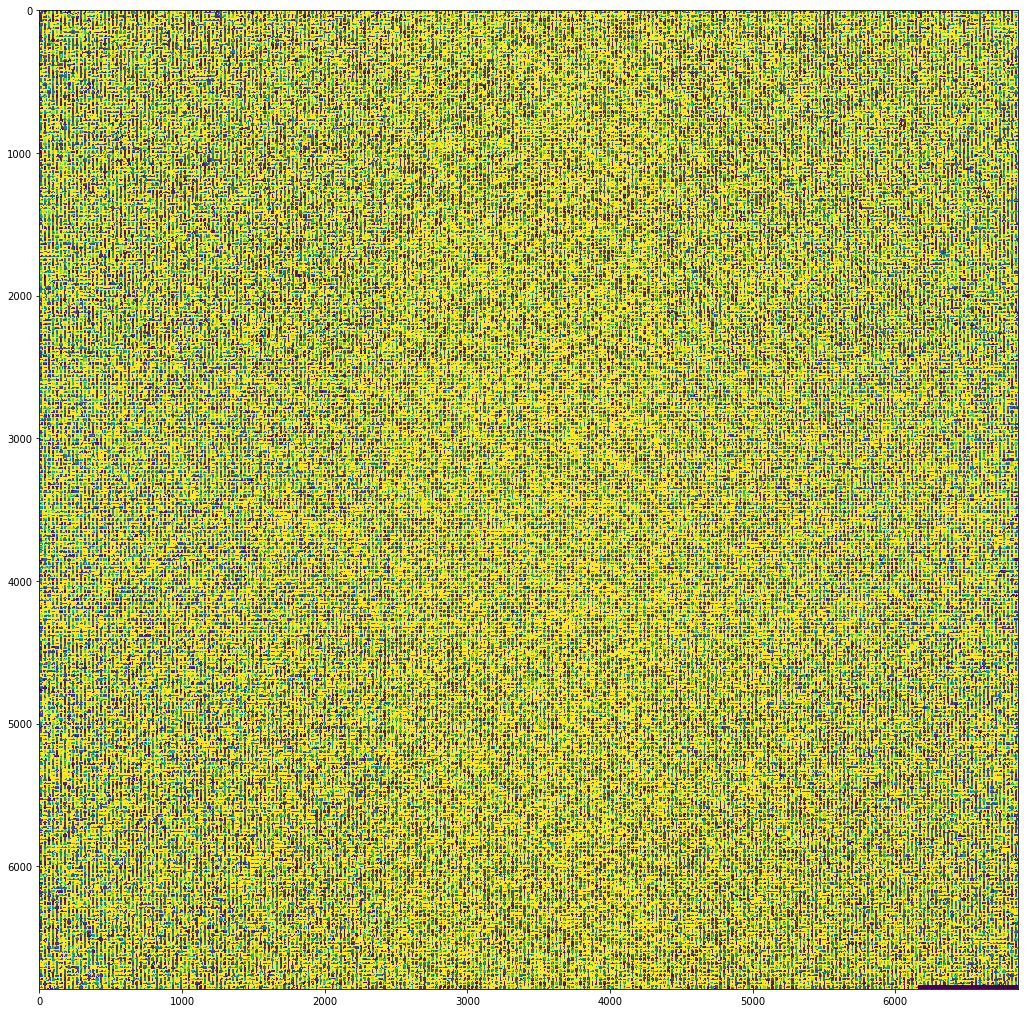

In [18]:
#整体显示
def create_sprite_image(images):
    import numpy as np
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))

    spriteimage = np.ones((img_h * n_plots, img_w * n_plots))

    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                j * img_w:(j + 1) * img_w] = this_img

    return spriteimage


def vector_to_matrix_mnist(mnist_digits):
    import numpy as np
    """Reshapes normal mnist digit (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(mnist_digits, (-1, 28, 28))


def invert_grayscale(mnist_digits):
    """ Makes black white, and white black """
    return 255 - mnist_digits


def get_sprite_image(to_visualise, do_invert=True):
    to_visualise = vector_to_matrix_mnist(to_visualise)
    if do_invert:
        to_visualise = invert_grayscale(to_visualise)
    return create_sprite_image(to_visualise)

plt.imshow(get_sprite_image(X_train))
plt.gcf().set_size_inches(18,18)###这里调节图像大小，但是没办法，图像太大了，显示不出来
plt.imsave('X_train-mnist-sprite.png', get_sprite_image(X_train), cmap='gray')

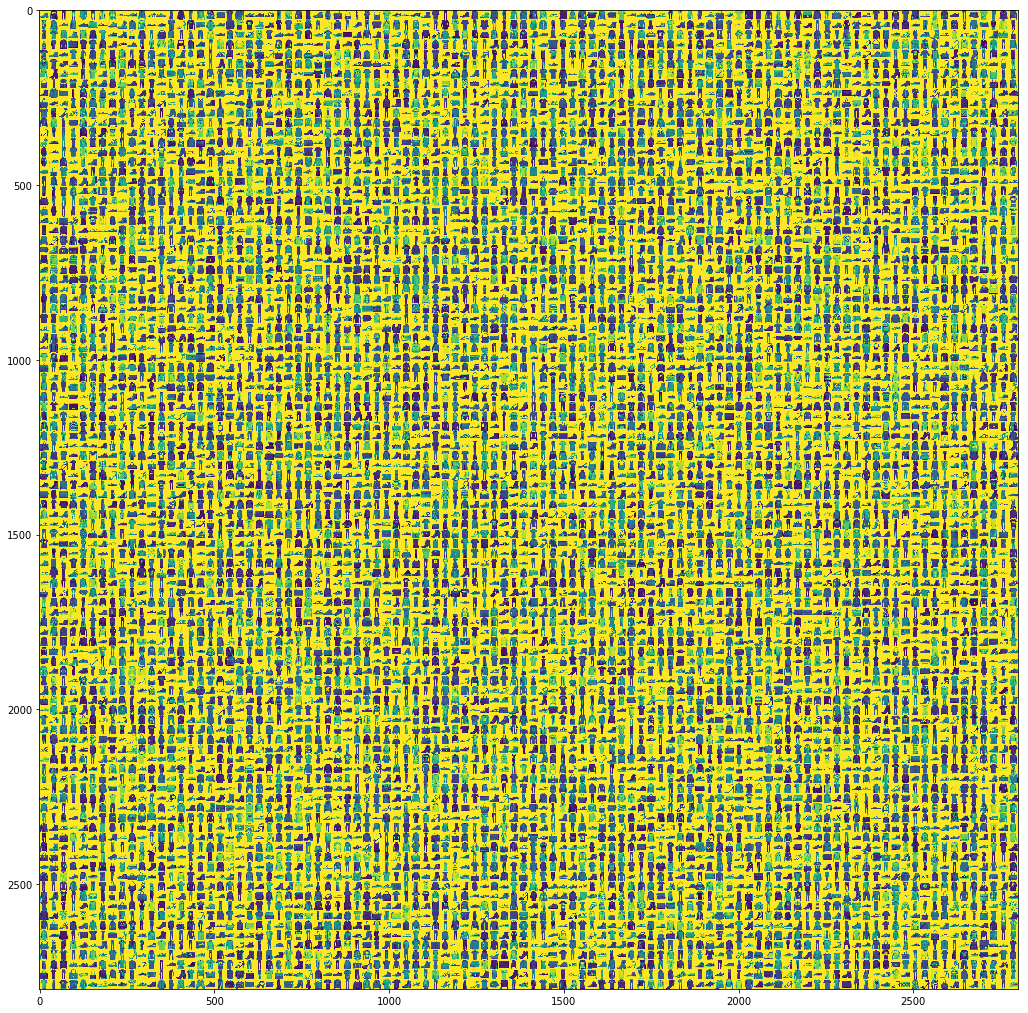

In [19]:
plt.imshow(get_sprite_image(X_test))
plt.gcf().set_size_inches(18,18)###这里调节图像大小，但是没办法，图像太大了，显示不出来
plt.imsave('X_test-mnist-sprite.png', get_sprite_image(X_test), cmap='gray')

# 3.设计训练KNN算法

#### 3.1  算法思路：

算法思路：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别。


k近邻模型的三个基本要素：
1. k值的选择：k值的选择会对结果产生重大影响。较小的k值可以减少近似误差，但是会增加估计误差；较大的k值可以减小估计误差，但是会增加近似误差。一般而言，通常采用交叉验证法来选取最优的k值。
2. 距离度量：距离反映了特征空间中两个实例的相似程度。可以采用欧氏距离、曼哈顿距离等。
3. 分类决策规则：往往采用多数表决。

In [6]:
import numpy as np


class Dataset(object):
    def __init__(self, dtype='uint8', is_row_iamge=False):
        '''数据集
        
        Args:
            dtype: uint8 或 float32，uint8：每个像素值的范围是[0, 255];float32像素值范围是[0., 1.]
            is_row_image: 是否将3维图片展开成1维
        '''
        images = np.fromfile('test images/images/test_image.bin', dtype=np.uint8).reshape(-1, 28, 28, 1)
        print(images.shape)
        if dtype == 'uint8':
            self.images = images
        else:
            images = images.astype(np.float32) / 255.
            self.images = images
        if is_row_iamge:
            self.images = images.reshape([-1, 784])
        self.num_of_images = 6500
        self.offset = 0
        print('共6500张图片')

    def next_batch(self, batch_size=50):
        # 返回False表示以及没有样本
        # 注意：最后一个批次可能不足batch_size 所以推荐选择6500可以整除的batch_size
        if (self.offset + batch_size) <= self.num_of_images:
            self.offset += batch_size
            return self.images[self.offset-batch_size : self.offset]
        elif self.offset < self.num_of_images:
            return self.images[self.offset : ]
        else:
            False

if __name__ == '__main__':
    images = Dataset()
    b_img = images.next_batch()
    print(b_img.shape)

(6500, 28, 28, 1)
共6500张图片
(50, 28, 28, 1)


Text(0.5,1,'EuclideanDistance\n')

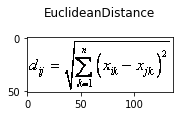

In [7]:
from PIL import Image
img=Image.open('./image/EuclideanDistance_clip_image002.gif')
plt.imshow(img)
plt.gcf().set_size_inches(4,1)
plt.title("EuclideanDistance\n")

#### 欧式距离计算方法

In [28]:
from sklearn import neighbors
kn_clf = neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2)
kn_clf.fit(X_train,y_train)
kn_y = kn_clf.predict(b_img)
#print('kn_y:',kn_y)
#print('y:',y_test)

In [36]:
f=open('dayin.txt', "w+")
line = f.readline()
for i in range(6500):
    f.write(str(int(kn_y[i]))+'\n')
f.close()

# 4.设计训练K-Means算法

#### 算法步骤：

#算法步骤：
1. 从n个数据中随机选择 k 个对象作为初始聚类中心；
2. 根据每个聚类对象的均值（中心对象），计算每个数据点与这些中心对象的距离；并根据最小距离准则，重新对数据进行划分；
3. 重新计算每个有变化的聚类簇的均值，选择与均值距离最小的数据作为中心对象；
4. 循环步骤2和3，直到每个聚类簇不再发生变化为止。


#### k-means方法的基本要素：


1. k值的选择：也就是类别的确定，与K近邻中k值的确定方法类似。
2. 距离度量：可以采用欧氏距离、曼哈顿距离等。

In [113]:
from sklearn import cluster

km = cluster.KMeans(n_clusters = 10)#发现聚类，不论选取几个群体，结果都是差不多效果
km.fit(X_train/255)
km_y = km.predict(X_train/255)
#print(km_y)
#print(y_train)

accuracy_km = (km_y == y_train).astype(int).mean()
print("accuracy_km:",accuracy_km)

[0 1 4 ..., 1 4 4]
[9 0 0 ..., 3 0 5]
0.182766666667


Text(0.5,1,'The difference between KNN and K-Means\n')

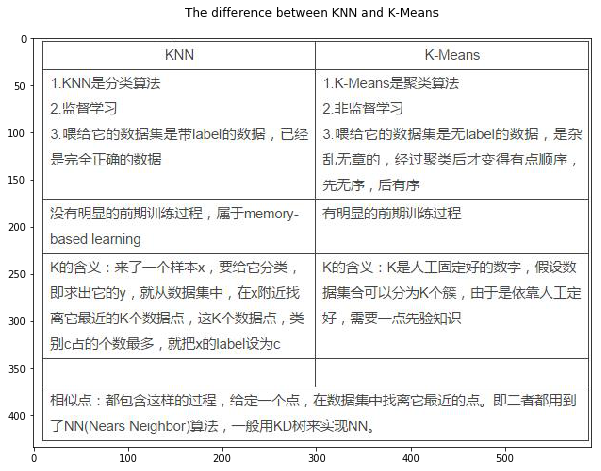

In [51]:
from PIL import Image
img=Image.open('./image/KNN和K-Means的区别.jpg')
plt.imshow(img)
plt.gcf().set_size_inches(10,8)
plt.title("The difference between KNN and K-Means\n")

# 5.设计训练NN算法

### 建立NeuralNetwork

[BernoulliRBM] Iteration 1, pseudo-likelihood = -224.07, time = 7.79s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -215.79, time = 8.84s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -217.11, time = 8.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -211.61, time = 9.63s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -209.47, time = 10.26s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -207.16, time = 10.39s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -210.70, time = 10.71s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -204.56, time = 9.89s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -207.07, time = 9.64s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -209.55, time = 11.28s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -208.05, time = 10.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -213.76, time = 10.98s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -209.11, time = 10.91s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -208.43, time = 10.71s
[Bernou

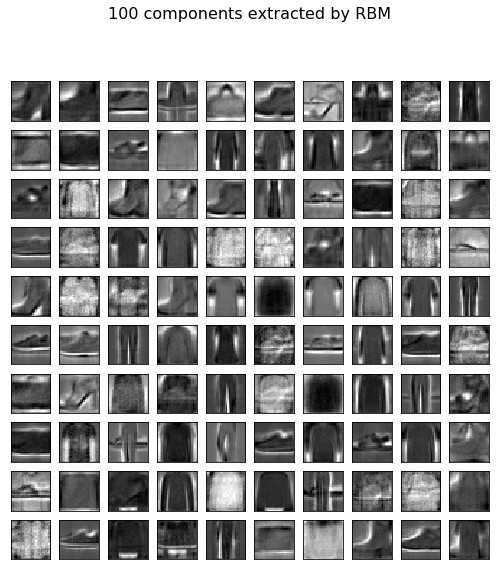

In [52]:
import numpy as np  
import matplotlib.pyplot as plt  
  
from scipy.ndimage import convolve  
from sklearn import linear_model, metrics  
from sklearn.cross_validation import train_test_split  
from sklearn.neural_network import BernoulliRBM  
from sklearn.pipeline import Pipeline  

# Models we will use  
logistic = linear_model.LogisticRegression()#作为激活函数
rbm = BernoulliRBM(random_state=0, verbose=True)  
  
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])  
  
###############################################################################  
# Training  
  
# Hyper-parameters. These were set by cross-validation,  
# using a GridSearchCV. Here we are not performing cross-validation to  
# save time.  
rbm.learning_rate = 0.06  
rbm.n_iter = 30  
# More components tend to give better prediction performance, but larger  
# fitting time  
rbm.n_components = 100
logistic.C = 6000.0  
  
# Training RBM-Logistic Pipeline  
classifier.fit(X_train/255, y_train)  
  
# Training Logistic regression  
# logistic_classifier = linear_model.LogisticRegression(C=100.0)  #这里也可以加入逻辑回归测试数据集的准确性
# logistic_classifier.fit(X_train/255,y_train)  
  
###############################################################################  
# Evaluation  
  
print()  
print("Logistic regression using RBM features:\n%s\n" % (  
    metrics.classification_report(  
        y_test,  
        classifier.predict(X_test/255))))  
  
# print("Logistic regression using raw pixel features:\n%s\n" % (  
#     metrics.classification_report(  
#         y_test,  
#         logistic_classifier.predict(X_test/255))))  
  
###############################################################################  
# Plotting  
  
plt.figure(figsize=(4.2, 4))  
for i, comp in enumerate(rbm.components_):  
    plt.subplot(10, 10, i + 1)  
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,  
               interpolation='nearest')  
    plt.xticks(())  
    plt.yticks(())  
plt.suptitle('100 components extracted by RBM', fontsize=16)  
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)  
plt.gcf().set_size_inches(8,8)
plt.show()